<a href="https://colab.research.google.com/github/hosseinrezaie0/CNN-VS-MLP/blob/main/SoftComputing_CNN_VS_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import pickle
import random
import cv2
import os

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Preprocessing

In [3]:
# Get the data
TRAINDIR = "/content/drive/MyDrive/Projects/Cat vs dog/train"
TESTDIR = "/content/drive/MyDrive/Projects/Cat vs dog/test"
CATEGORIES = ["cats", "dogs"]

In [4]:
# Create train data
train_data = []

def create_train_data():
  for category in CATEGORIES:
    path = os.path.join(TRAINDIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img))
      resized_img = cv2.resize(img_array, (128,128))
      train_data.append([resized_img, class_num])
create_train_data()

In [5]:
len(train_data)

557

In [6]:
random.shuffle(train_data)

In [7]:
for sample in train_data[:10]:
  print(sample[1])

1
0
0
1
1
1
1
1
0
1


In [8]:
# Create test data
test_data = []
def create_test_data():
  for category in CATEGORIES:
    path = os.path.join(TESTDIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img))
      resized_img = cv2.resize(img_array, (128,128))
      test_data.append([resized_img, class_num])
create_test_data()

In [9]:
len(test_data)

140

In [15]:
# Split into x and y
x_train = []
x_test = []
y_train = []
y_test = []
for features, label in train_data:
  x_train.append(features)
  y_train.append(label)
for features, label in test_data:
  x_test.append(features)
  y_test.append(label)

In [18]:
len(x_train), len(y_train)

(557, 557)

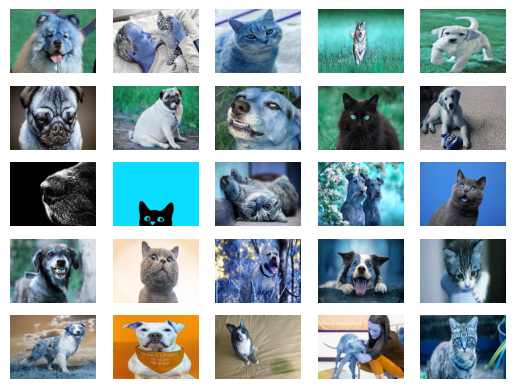

In [21]:
# Show 25 samples of x_train
fig, ax = plt.subplots(5,5)
k = 0
for i in range(5):
  for j in range(5):
    ax[i][j].axis("off")
    ax[i][j].imshow(x_train[k], aspect="auto")
    k = k+1

In [24]:
# save the data
pickle.dump(x_train, open("/content/drive/MyDrive/Projects/Cat vs dog/x_train.pickle", "wb"))
pickle.dump(x_test, open("/content/drive/MyDrive/Projects/Cat vs dog/x_test.pickle", "wb"))
pickle.dump(y_train, open("/content/drive/MyDrive/Projects/Cat vs dog/y_train.pickle", "wb"))
pickle.dump(y_test, open("/content/drive/MyDrive/Projects/Cat vs dog/y_test.pickle", "wb"))

# Train the model

In [26]:
# load the data
x_train = pickle.load(open("/content/drive/MyDrive/Projects/Cat vs dog/x_train.pickle", "rb"))
x_test = pickle.load(open("/content/drive/MyDrive/Projects/Cat vs dog/x_test.pickle", "rb"))
y_train = pickle.load(open("/content/drive/MyDrive/Projects/Cat vs dog/y_train.pickle","rb"))
y_test =pickle.load(open("/content/drive/MyDrive/Projects/Cat vs dog/y_test.pickle","rb"))

In [27]:
len(x_train)

557